## E1 : Shortest Path Semantic Similarity Score

In this notebook we will be exploring the semantic relationship between student and reference responses using the following formula;

**shortest path**
$$
Sim_{path} = \frac{1}{length}
$$

where $length$ is the length of the shortest path between two concepts in the wordnet graph hierarchy using node-counting.


### Lemmatization

In this and future analyses we will probably be using lemmatization exclusively, it is unlikely we will be comparing the results with lemmatization and stemming since lemmatization has shown itself to be a better technique.

[Lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) is the process of finding the lemma or dictionary form of a word.

### Complexity

This is a computationally time intensive method.

For every word in a student answer which is an open-class word we have to iterate through all the words in the model answer of the same class and find the semantic similarity between each word pair. This operation alone means the algorithm is $O(n^{2})$, however finding the concepts in wordnet takes even more time.

Given each student-teacher word pair $(w_{s}, w_{t})$ we have to find the synonyms of the student word $w_{s}$ and the synonyms of the teacher word $w_{t}$ and for each student word synonym we have to iterate over every teacher word synonym which is also a $O(n^{2})$ operation.

This means the overall computational complexity of the algorithm is $O(n^{4})$ which is pretty inefficent, but still manageable for smaller $n$ and can still definitely be deployed in production scenarios.

#### REFERENCES
1. Mohler - Text-to-Text similarity for ASAG

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import pandas as pd
import numpy as np
import libs.stats as stats
import libs.preprocessing as pp
import libs.data as data
import libs.utils as utils
import exp_libs.wordnet as wn
import spacy
from importlib import reload

In [2]:
df_en = data.load_dataframe("../../../datasets/final/en/asag_v2_en_filter.csv")
display(df_en.head(1))
nlp_en = spacy.load('en')

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

### Exp. 1: Lang=English, Lexical_Matching=False

In [26]:
res1 = wn.run_entailment_model(nlp_en, df_en, sim_fn=wn.shortest_path, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


             precision    recall  f1-score   support

        0.0       0.02      0.14      0.04        14
        1.0       0.01      0.50      0.02         8
        2.0       0.12      0.35      0.18       234
        3.0       0.07      0.24      0.11       157
        4.0       0.24      0.10      0.14       676
        5.0       0.58      0.08      0.14       921

avg / total       0.37      0.13      0.14      2010

Pearson's R: 0.2794998166539636
Cohen's Kappa: -0.002993438670517712
MAE: 1.6233830845771144
Accuracy: 13.13%
Precision: 36.91%
Recall: 13.13%
F1-Measure: 14.10%


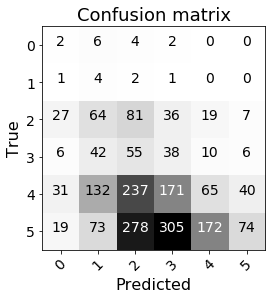

In [28]:
y_true_en = np.round(df_en['Score'].as_matrix())

stats.print_all_stats(y_true_en, res1['y_pred'])

exp1_data = stats.get_all_stats(y_true_en, res1['y_pred'])
# %store exp1_data

stats.plot_confusion_matrix(stats.cm(y_true_en, res1['y_pred']), classes=np.arange(6))

In [64]:
## Store Results
data.save('../tmp/e1_exp_01', res1)

In [65]:
data.load('../tmp/e1_exp_01')

{'y_pred': array([1, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.25179739, 0.52997076, 0.77272727, ..., 0.        , 0.66666667,
        0.35      ]),
 'y_true': array([4, 5, 4, ..., 2, 5, 2]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 2: Lang=English, Lexical_Matching=True

In [52]:
res2 = wn.run_entailment_model(nlp_en, df_en, sim_fn=wn.shortest_path, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=True,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


             precision    recall  f1-score   support

        0.0       0.03      0.14      0.04        14
        1.0       0.01      0.50      0.03         8
        2.0       0.12      0.34      0.18       234
        3.0       0.07      0.25      0.11       157
        4.0       0.23      0.10      0.14       676
        5.0       0.61      0.10      0.17       921

avg / total       0.38      0.14      0.15      2010

Pearson's R: 0.29641839529835323
Cohen's Kappa: -0.0025122950547440404
MAE: 1.5228855721393035
Accuracy: 14.08%
Precision: 37.83%
Recall: 14.08%
F1-Measure: 15.42%


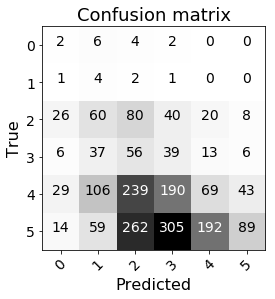

In [53]:
stats.print_all_stats(res2['y_true'], res2['y_pred'])
exp2_data = stats.get_all_stats(res2['y_true'], res2['y_pred'])
# %store exp2_data
stats.plot_confusion_matrix(stats.cm(res2['y_true'], res2['y_pred']), classes=np.arange(6))

In [66]:
## Store Results
data.save('../tmp/e1_exp_02', res2)

In [67]:
data.load('../tmp/e1_exp_02')

{'y_pred': array([1, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.25179739, 0.52997076, 0.77272727, ..., 0.        , 0.66666667,
        0.35      ]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 3: Lang=Spanish, Lexical_Matching=False

In [56]:
df_es = pd.read_csv("../../../datasets/final/es/asag_v2_es_filter.csv", sep='~', index_col=False)
display(df_es.head(1))
nlp_es = spacy.load('es')

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [57]:
res3 = wn.run_entailment_model(nlp_es, df_es, sim_fn=wn.shortest_path, 
                                  lang='spa',
                                  stop_words=pp.ES_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


             precision    recall  f1-score   support

        0.0       0.04      0.93      0.08        14
        1.0       0.01      0.75      0.02         8
        2.0       0.09      0.26      0.13       234
        3.0       0.02      0.04      0.03       157
        4.0       0.23      0.03      0.06       676
        5.0       0.67      0.01      0.03       921

avg / total       0.40      0.06      0.05      2010

Pearson's R: 0.2496848105210319
Cohen's Kappa: -0.0124228270446336
MAE: 2.4885572139303482
Accuracy: 5.97%
Precision: 39.53%
Recall: 5.97%
F1-Measure: 4.95%


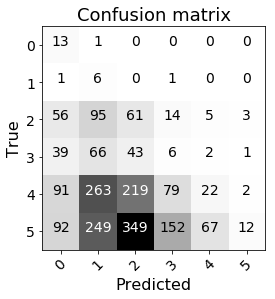

In [58]:
stats.print_all_stats(res3['y_true'], res3['y_pred'])
exp3_data = stats.get_all_stats(res3['y_true'], res3['y_pred'])
# %store exp3_data
stats.plot_confusion_matrix(stats.cm(res3['y_true'], res3['y_pred']), classes=np.arange(6))

In [68]:
## Store Results
data.save('../tmp/e1_exp_03', res3)
data.load('../tmp/e1_exp_03')

### Exp.4: MA=3

In [3]:
res4 = wn.run_entailment_model_k(nlp_en, df_en, sim_fn=wn.shortest_path, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'],
                                  ma_count=3)

batch: 100 done.
batch: 200 done.
batch: 300 done.
batch: 400 done.
batch: 500 done.
batch: 600 done.
batch: 700 done.
batch: 800 done.
batch: 900 done.
batch: 1000 done.
batch: 1100 done.
batch: 1200 done.
batch: 1300 done.
batch: 1400 done.
batch: 1500 done.
batch: 1600 done.
batch: 1700 done.
batch: 1800 done.
batch: 1900 done.
batch: 2000 done.


             precision    recall  f1-score   support

        0.0       0.05      0.14      0.07        14
        1.0       0.02      0.25      0.03         8
        2.0       0.18      0.40      0.25       234
        3.0       0.07      0.34      0.12       157
        4.0       0.28      0.17      0.22       676
        5.0       0.63      0.15      0.24       921

avg / total       0.41      0.20      0.22      2010

Pearson's R: 0.30773887698482766
Cohen's Kappa: 0.029313787802975888
MAE: 1.118407960199005
Accuracy: 20.05%
Precision: 41.16%
Recall: 20.05%
F1-Measure: 22.02%


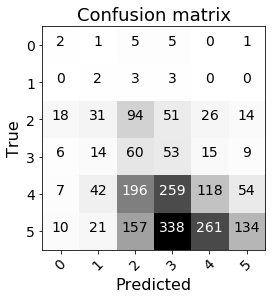

In [5]:
stats.print_all_stats(res4['y_true'], res4['y_pred'])
exp3_data = stats.get_all_stats(res4['y_true'], res4['y_pred'])
# %store exp3_data
stats.plot_confusion_matrix(stats.cm(res4['y_true'], res4['y_pred']), classes=np.arange(6))

In [6]:
## Store Results
data.save('../tmp/e1_exp_04', res4)
data.load('../tmp/e1_exp_04')

{'y_pred': array([2, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.38176471, 0.52997076, 0.77272727, ..., 0.        , 0.66666667,
        0.35      ]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}